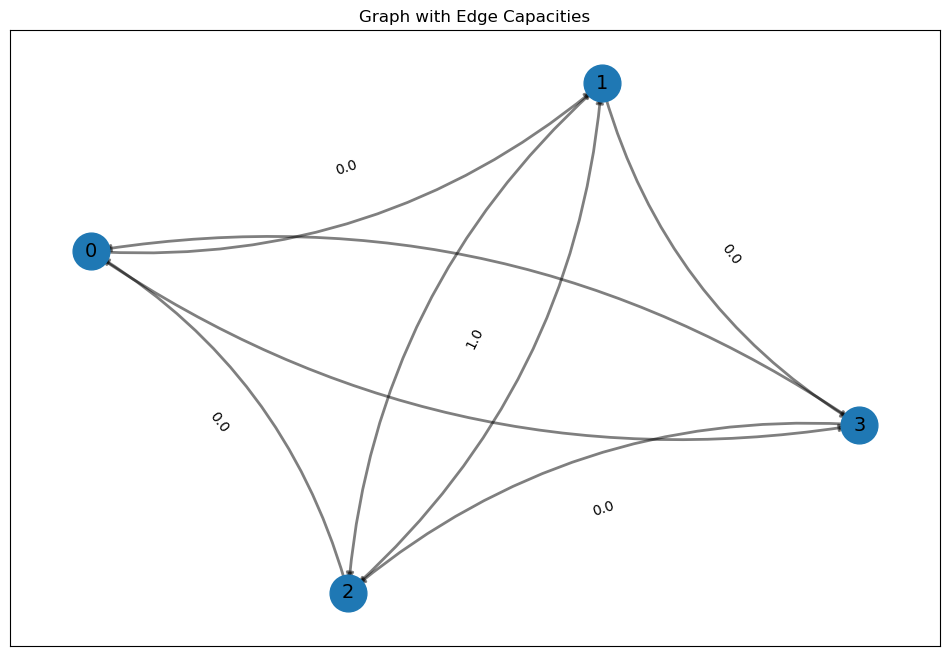

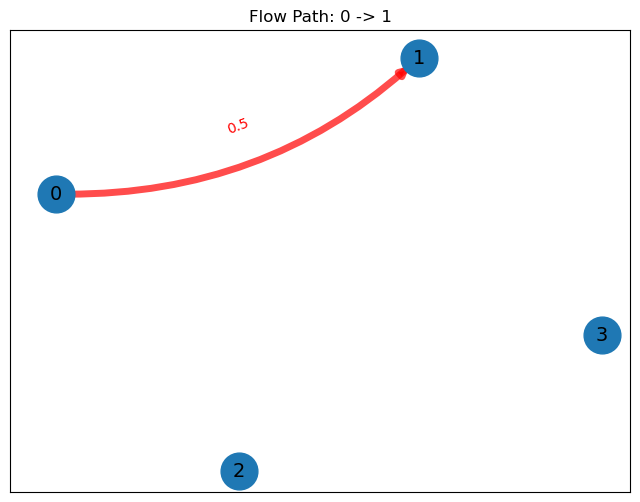

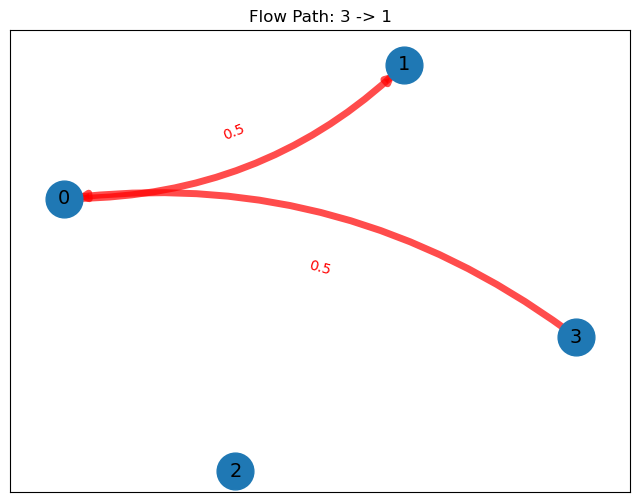

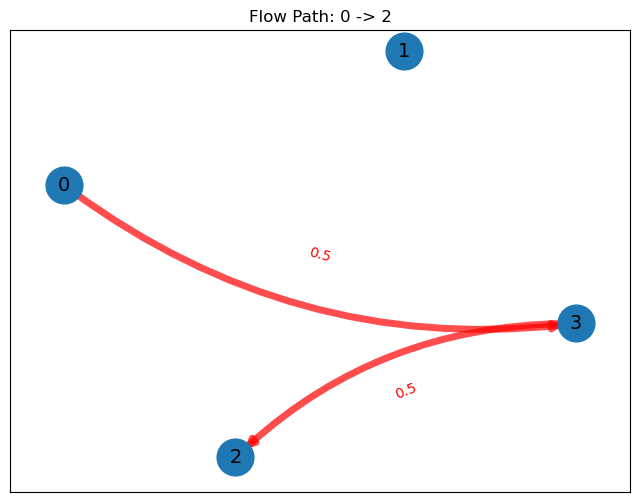

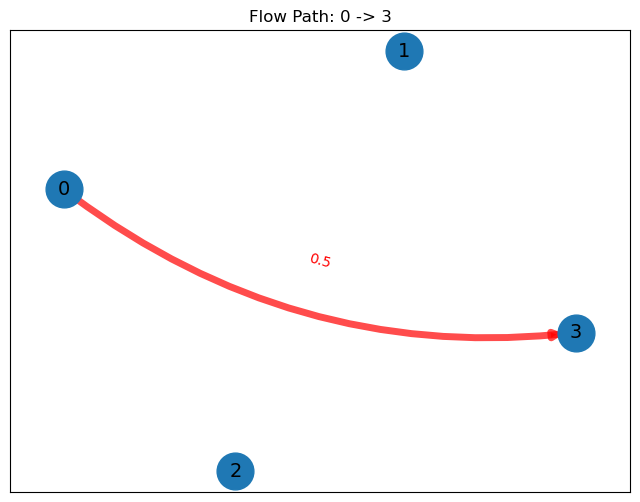

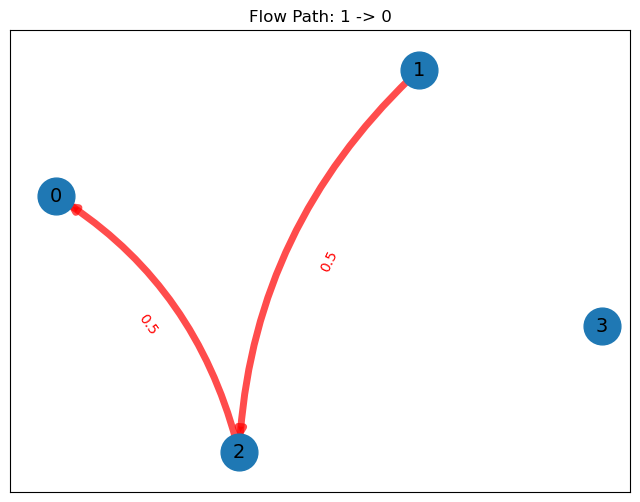

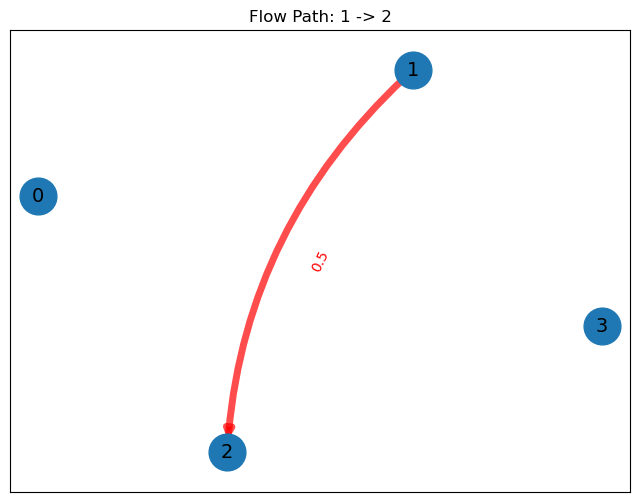

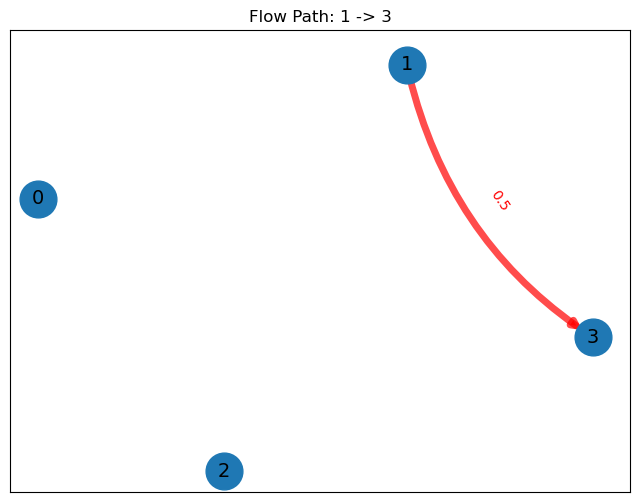

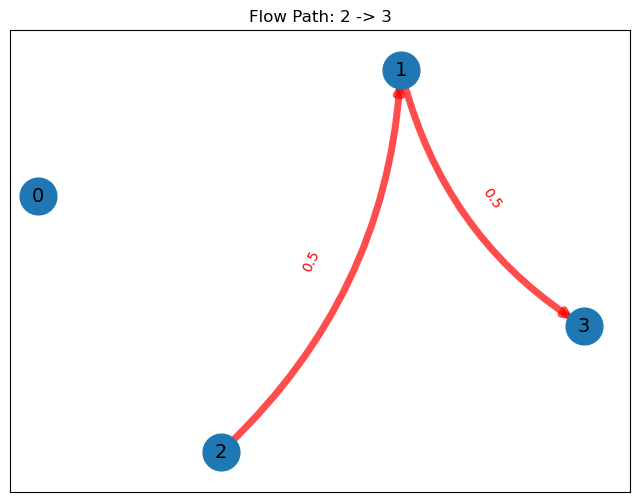

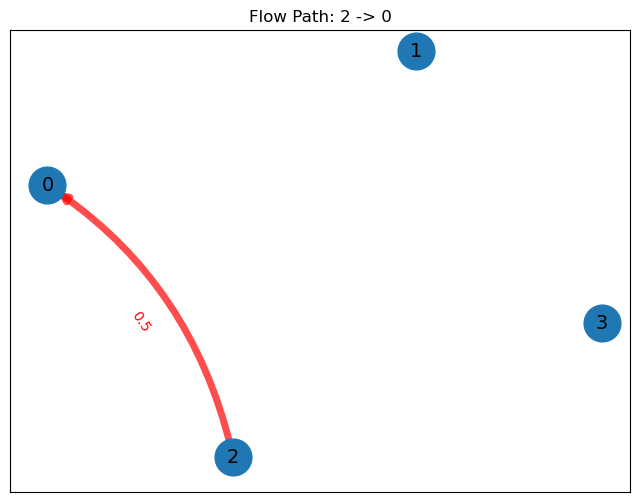

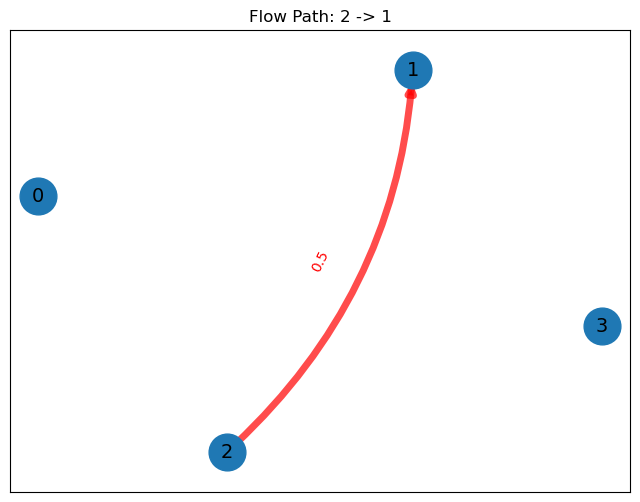

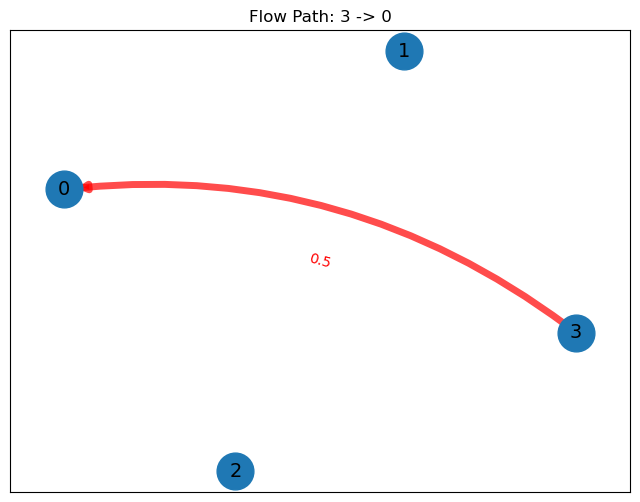

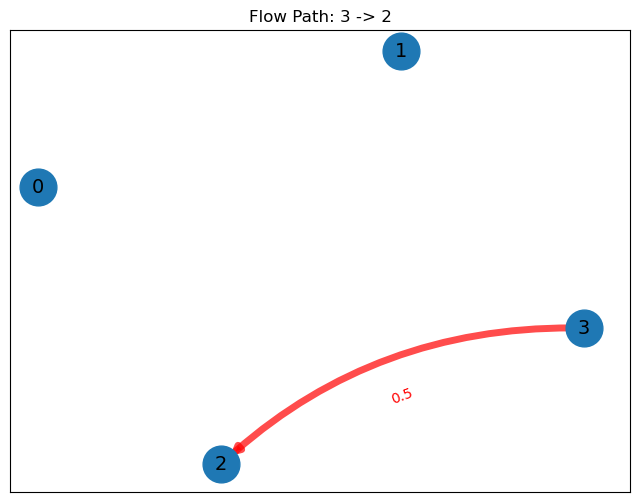

In [1]:
#Code mostly from ChatGPT to visualize solutions from EVariable, no actual computing
#Currently convenient as a notebook for displaying graphs inside the IDE
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

# Parsing the input data
edges = {}
flows = defaultdict(list)  # Using a defaultdict to group flows by (start_node, end_node)

# Provided input data
data = '''
edge_0_1 = 1.0
edge_0_3 = 1.0
edge_1_2 = 1.0
edge_1_3 = 1.0
edge_2_0 = 1.0
edge_2_1 = 1.0
edge_3_0 = 1.0
edge_3_2 = 1.0
flow_0_1_0_1 = 0.5
flow_3_1_0_1 = 0.5
flow_0_2_0_3 = 0.5
flow_0_3_0_3 = 0.5
flow_1_0_1_2 = 0.5
flow_1_2_1_2 = 0.5
flow_1_3_1_3 = 0.5
flow_2_3_1_3 = 0.5
flow_1_0_2_0 = 0.5
flow_2_0_2_0 = 0.5
flow_2_1_2_1 = 0.5
flow_2_3_2_1 = 0.5
flow_3_0_3_0 = 0.5
flow_3_1_3_0 = 0.5
flow_0_2_3_2 = 0.5
flow_3_2_3_2 = 0.5
'''

# Splitting and processing the data
for line in data.strip().split('\n'):
    key, value = line.split(' = ')
    value = float(value)
    
    if key.startswith('edge'):
        _, from_node, to_node = key.split('_')
        edges[(int(from_node), int(to_node))] = value
    elif key.startswith('flow'):
        _, start_node, end_node, from_node, to_node = key.split('_')
        flows[(int(start_node), int(end_node))].append((int(from_node), int(to_node), value))

# Creating the directed graph
G = nx.DiGraph()

# Adding edges with capacities
for (from_node, to_node), capacity in edges.items():
    G.add_edge(from_node, to_node, capacity=capacity)

# Use a spring layout for positions, which helps with curved edges
pos = nx.spring_layout(G)  # positions for all nodes

# Plotting the overall graph with capacities
plt.figure(figsize=(12, 8))

# Draw the full graph with all edges
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='black', connectionstyle='arc3,rad=0.2')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Draw edge labels (capacities)
edge_labels = {}
for (from_node, to_node), capacity in edges.items():
    edge_labels[(from_node, to_node)] = f'{capacity:.1f}'
    edge_labels[(to_node, from_node)] = f'{edges.get((to_node, from_node), 0):.1f}'  # Label for the reverse direction
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Graph with Edge Capacities')
plt.show()

# Plotting each flow path with grouped flows by (start_node, end_node)
for (start_node, end_node), flow_edges in flows.items():
    plt.figure(figsize=(8, 6))
    
    # Draw the base graph
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')
    
    # Highlight all flow edges for the given (start_node, end_node)
    flow_edges_list = [(from_node, to_node) for from_node, to_node, _ in flow_edges]
    nx.draw_networkx_edges(G, pos, edgelist=flow_edges_list, width=5, alpha=0.7, edge_color='red', connectionstyle='arc3,rad=0.2')
    
    # Show flow values on the specific edges
    flow_labels = {(from_node, to_node): f'{flow_value:.1f}' for from_node, to_node, flow_value in flow_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=flow_labels, font_color='red')
    
    plt.title(f'Flow Path: {start_node} -> {end_node}')
    plt.show()
